# Loading the data

In [1]:
import pandas
from time import time
col_names = ["duration", "protocol_type", "service", "flag", "src_bytes", "dst_bytes", "land", "wrong_fragment", "urgent", "hot", 
             "num_failed_logins", "logged_in", "num_compromised", "root_shell", "su_attempted", "num_root", "num_file_creations", 
             "num_shells", "num_access_files", "num_outbound_cmds", "is_host_login", "is_guest_login", "count", "srv_count", 
             "serror_rate", "srv_serror_rate", "rerror_rate", "srv_rerror_rate", "same_srv_rate", "diff_srv_rate", 
             "srv_diff_host_rate", "dst_host_count","dst_host_srv_count", "dst_host_same_srv_rate", "dst_host_diff_srv_rate", 
             "dst_host_same_src_port_rate", "dst_host_srv_diff_host_rate", "dst_host_serror_rate", "dst_host_srv_serror_rate", 
             "dst_host_rerror_rate", "dst_host_srv_rerror_rate", "label"]
kdd_data_10percent = pandas.read_csv("kddcup.data_10_percent_corrected.csv", names = col_names)
kdd_data_10percent.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,494021.000000,4.940210e+05,4.940210e+05,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,...,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000
mean,47.979302,3.025610e+03,8.685324e+02,0.000045,0.006433,0.000014,0.034519,0.000152,0.148247,0.010212,...,232.470778,188.665670,0.753780,0.030906,0.601935,0.006684,0.176754,0.176443,0.058118,0.057412
std,707.746472,9.882181e+05,3.304000e+04,0.006673,0.134805,0.005510,0.782103,0.015520,0.355345,1.798326,...,64.745380,106.040437,0.410781,0.109259,0.481309,0.042133,0.380593,0.380919,0.230590,0.230140
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,4.500000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,46.000000,0.410000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,5.200000e+02,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.032000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.040000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,58329.000000,6.933756e+08,5.155468e+06,1.000000,3.000000,3.000000,30.000000,5.000000,1.000000,884.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## The labels are distributed

In [2]:
kdd_data_10percent['label'].value_counts()

label
smurf.              280790
neptune.            107201
normal.              97278
back.                 2203
satan.                1589
ipsweep.              1247
portsweep.            1040
warezclient.          1020
teardrop.              979
pod.                   264
nmap.                  231
guess_passwd.           53
buffer_overflow.        30
land.                   21
warezmaster.            20
imap.                   12
rootkit.                10
loadmodule.              9
ftp_write.               8
multihop.                7
phf.                     4
perl.                    3
spy.                     2
Name: count, dtype: int64

## All features

In [3]:
num_features = ["duration", "src_bytes", "dst_bytes", "land", "wrong_fragment", "urgent", "hot", "num_failed_logins", 
                "logged_in", "num_compromised", "root_shell", "su_attempted", "num_root", "num_file_creations", "num_shells",
                "num_access_files", "num_outbound_cmds", "is_host_login", "is_guest_login", "count", "srv_count", "serror_rate", 
                "srv_serror_rate", "rerror_rate", "srv_rerror_rate", "same_srv_rate", "diff_srv_rate", "srv_diff_host_rate",
                "dst_host_count", "dst_host_srv_count", "dst_host_same_srv_rate", "dst_host_diff_srv_rate", 
                "dst_host_same_src_port_rate", "dst_host_srv_diff_host_rate", "dst_host_serror_rate", "dst_host_srv_serror_rate",
                "dst_host_rerror_rate", "dst_host_srv_rerror_rate"]
features = kdd_data_10percent[num_features].astype(float)
features.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,494021.000000,4.940210e+05,4.940210e+05,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,...,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000
mean,47.979302,3.025610e+03,8.685324e+02,0.000045,0.006433,0.000014,0.034519,0.000152,0.148247,0.010212,...,232.470778,188.665670,0.753780,0.030906,0.601935,0.006684,0.176754,0.176443,0.058118,0.057412
std,707.746472,9.882181e+05,3.304000e+04,0.006673,0.134805,0.005510,0.782103,0.015520,0.355345,1.798326,...,64.745380,106.040437,0.410781,0.109259,0.481309,0.042133,0.380593,0.380919,0.230590,0.230140
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,4.500000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,46.000000,0.410000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,5.200000e+02,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.032000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.040000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,58329.000000,6.933756e+08,5.155468e+06,1.000000,3.000000,3.000000,30.000000,5.000000,1.000000,884.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Reduce the outputs to 'normal' and 'attack'

In [4]:
from sklearn.neighbors import KNeighborsClassifier
labels = kdd_data_10percent['label'].copy()
labels[labels != 'normal.'] = 'attack.'
labels.value_counts()

label
attack.    396743
normal.     97278
Name: count, dtype: int64

# Rescaling the data

In [5]:
# Ignoring the deprecation warnings
import warnings
from sklearn.preprocessing import MinMaxScaler
warnings.filterwarnings("ignore", category = DeprecationWarning) 

print("Kiểu dữ liệu của các cột trước khi xử lý:")
print(features.dtypes)

# Chọn các cột có kiểu dữ liệu dạng số
numeric_features = features.select_dtypes(include=['number'])

## Áp dụng MinMaxScaler cho các cột dạng số
scaler = MinMaxScaler()
features[numeric_features.columns] = scaler.fit_transform(numeric_features)

Kiểu dữ liệu của các cột trước khi xử lý:
duration                       float64
src_bytes                      float64
dst_bytes                      float64
land                           float64
wrong_fragment                 float64
urgent                         float64
hot                            float64
num_failed_logins              float64
logged_in                      float64
num_compromised                float64
root_shell                     float64
su_attempted                   float64
num_root                       float64
num_file_creations             float64
num_shells                     float64
num_access_files               float64
num_outbound_cmds              float64
is_host_login                  float64
is_guest_login                 float64
count                          float64
srv_count                      float64
serror_rate                    float64
srv_serror_rate                float64
rerror_rate                    float64
srv_rerror_rate       

## Check the results after scaling

In [6]:
print("Mô tả thống kê của các cột sau khi scale:")
print(features.describe())

Mô tả thống kê của các cột sau khi scale:
            duration     src_bytes      dst_bytes           land  \
count  494021.000000  4.940210e+05  494021.000000  494021.000000   
mean        0.000823  4.363595e-06       0.000168       0.000045   
std         0.012134  1.425228e-03       0.006409       0.006673   
min         0.000000  0.000000e+00       0.000000       0.000000   
25%         0.000000  6.489989e-08       0.000000       0.000000   
50%         0.000000  7.499542e-07       0.000000       0.000000   
75%         0.000000  1.488371e-06       0.000000       0.000000   
max         1.000000  1.000000e+00       1.000000       1.000000   

       wrong_fragment         urgent            hot  num_failed_logins  \
count   494021.000000  494021.000000  494021.000000      494021.000000   
mean         0.002144       0.000005       0.001151           0.000030   
std          0.044935       0.001837       0.026070           0.003104   
min          0.000000       0.000000       0.0000

# Training a classifier

In [7]:
clf = KNeighborsClassifier(n_neighbors = 5, algorithm = 'ball_tree', leaf_size = 500)
t0 = time()
clf.fit(features, labels)
tt = time() - t0
print ("Classifier trained in {} seconds.".format(round(tt, 3)))

Classifier trained in 3.411 seconds.


# Loading the labelled test data

In [8]:
kdd_data_corrected = pandas.read_csv("correctedDataset.csv", header=None, names = col_names)
kdd_data_corrected['label'].value_counts()

label
smurf.              164091
normal.              60593
neptune.             58001
snmpgetattack.        7741
mailbomb.             5000
guess_passwd.         4367
snmpguess.            2406
satan.                1633
warezmaster.          1602
back.                 1098
mscan.                1053
apache2.               794
processtable.          759
saint.                 736
portsweep.             354
ipsweep.               306
httptunnel.            158
pod.                    87
nmap.                   84
buffer_overflow.        22
multihop.               18
named.                  17
sendmail.               17
ps.                     16
xterm.                  13
rootkit.                13
teardrop.               12
xlock.                   9
land.                    9
xsnoop.                  4
ftp_write.               3
perl.                    2
phf.                     2
udpstorm.                2
worm.                    2
loadmodule.              2
sqlattack.            

## Converting all the new attack labels to 'attack.'

In [9]:
kdd_data_corrected['label'][kdd_data_corrected['label']!='normal.'] = 'attack.'
kdd_data_corrected['label'].value_counts()

C:\Users\thanh\AppData\Local\Temp\ipykernel_7036\439388514.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  kdd_data_corrected['label'][kdd_data_corrected['label']!='normal.'] = 'attack.'
C:\Users\thanh\AppData\Local\Temp\ipykernel_7036\4

label
attack.    250436
normal.     60593
Name: count, dtype: int64

In [10]:
# Ignoring the deprecation warnings
import warnings
warnings.filterwarnings("ignore", category = DeprecationWarning) 

## Rescaling the data

In [11]:
from sklearn.preprocessing import MinMaxScaler
# Chuyển đổi cột số thành float
kdd_data_corrected[num_features] = kdd_data_corrected[num_features].astype(float)

# Khởi tạo và áp dụng MinMaxScaler
scaler = MinMaxScaler()
kdd_data_corrected[num_features] = scaler.fit_transform(kdd_data_corrected[num_features])

# Hiển thị kết quả
print(kdd_data_corrected[num_features].describe())

            duration      src_bytes      dst_bytes           land  \
count  311029.000000  311029.000000  311029.000000  311029.000000   
mean        0.000310       0.000028       0.000144       0.000029   
std         0.007063       0.002032       0.003098       0.005379   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000002       0.000000       0.000000   
50%         0.000000       0.000008       0.000000       0.000000   
75%         0.000000       0.000016       0.000000       0.000000   
max         1.000000       1.000000       1.000000       1.000000   

       wrong_fragment         urgent            hot  num_failed_logins  \
count   311029.000000  311029.000000  311029.000000      311029.000000   
mean         0.000254       0.000017       0.000145           0.000591   
std          0.013456       0.003274       0.003090           0.012498   
min          0.000000       0.000000       0.000000           0.000000   
25%     

## After scaling, sample 10% of the training data

In [12]:
#Now, after scaling, we can sample 10% of the training data
from sklearn.model_selection import train_test_split
features_train, features_test, labels_train, labels_test = train_test_split(kdd_data_corrected[num_features], 
                                                                            kdd_data_corrected['label'], test_size=0.1, 
                                                                            random_state=42)

# Predictions on the test data

In [13]:
clf.fit(features, labels)
t0 = time()
pred = clf.predict(features_test)
tt = time() - t0
print ("Predicted in {} seconds".format(round(tt,3)))

Predicted in 335.511 seconds


# Calculating out the accuracy


In [14]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(pred, labels_test)
print ("Accuracy is {}.".format(round(acc,4)))

Accuracy is 0.92.


## Visualising the results

C:\Users\thanh\AppData\Local\Temp\ipykernel_7036\1058039997.py:27: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(


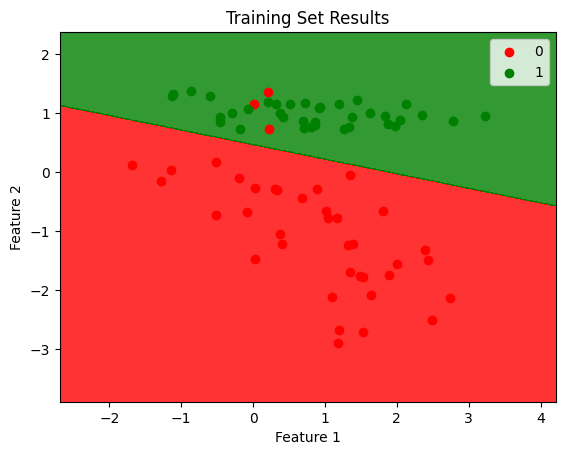

C:\Users\thanh\AppData\Local\Temp\ipykernel_7036\1058039997.py:59: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(


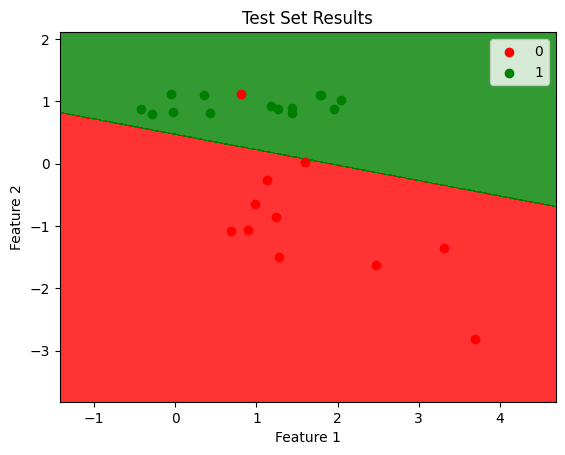

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Visualize the training set results
def visualize_training_results(X_train, y_train, model, title="Training Set Results"):
    # Define the mesh grid
    X1, X2 = np.meshgrid(
        np.arange(X_train[:, 0].min() - 1, X_train[:, 0].max() + 1, 0.01),
        np.arange(X_train[:, 1].min() - 1, X_train[:, 1].max() + 1, 0.01)
    )
    
    # Predict for each point in the grid
    Z = model.predict(np.array([X1.ravel(), X2.ravel()]).T)
    Z = Z.reshape(X1.shape)
    
    # Plot decision boundary
    plt.contourf(X1, X2, Z, alpha=0.8, cmap=ListedColormap(('red', 'green')))
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    
    # Plot training data points
    for i, j in enumerate(np.unique(y_train)):
        plt.scatter(
            X_train[y_train == j, 0],
            X_train[y_train == j, 1],
            c=ListedColormap(('red', 'green'))(i),
            label=j
        )
    
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend()
    plt.show()

# Visualize the test set results
def visualize_test_results(X_test, y_test, model, title="Test Set Results"):
    # Define the mesh grid
    X1, X2 = np.meshgrid(
        np.arange(X_test[:, 0].min() - 1, X_test[:, 0].max() + 1, 0.01),
        np.arange(X_test[:, 1].min() - 1, X_test[:, 1].max() + 1, 0.01)
    )
    
    # Predict for each point in the grid
    Z = model.predict(np.array([X1.ravel(), X2.ravel()]).T)
    Z = Z.reshape(X1.shape)
    
    # Plot decision boundary
    plt.contourf(X1, X2, Z, alpha=0.8, cmap=ListedColormap(('red', 'green')))
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    
    # Plot test data points
    for i, j in enumerate(np.unique(y_test)):
        plt.scatter(
            X_test[y_test == j, 0],
            X_test[y_test == j, 1],
            c=ListedColormap(('red', 'green'))(i),
            label=j
        )
    
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend()
    plt.show()

# Example usage:
# Create a sample dataset with 2 features
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2, n_clusters_per_class=1, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Train a simple model
model = LogisticRegression()
model.fit(X_train, y_train)

# Ensure X_train has exactly 2 features for this visualization
if X_train.shape[1] == 2:
    visualize_training_results(X_train, y_train, model)
else:
    print("Visualization is limited to datasets with exactly 2 features.")

# Ensure X_test has exactly 2 features for this visualization
if X_test.shape[1] == 2:
    visualize_test_results(X_test, y_test, model)
else:
    print("Visualization is limited to datasets with exactly 2 features.")